Model Training for Algerain Dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [5]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [6]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [7]:
df.value_counts('Classes')

Classes
1    137
0    106
Name: count, dtype: int64

In [8]:
df = df.drop(['day','month','year'],axis=1)

In [9]:
x = df.drop('FWI',axis=1)
y = df['FWI']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [11]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

<Axes: >

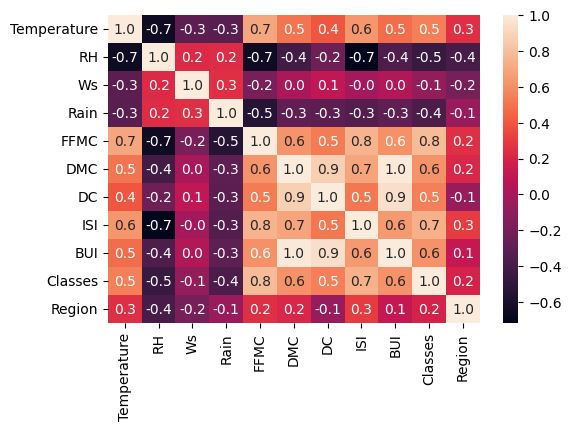

In [12]:
plt.figure(figsize = (6,4))
corr = x_train.corr()
sns.heatmap(corr, annot=True,fmt=".1f")

In [13]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr = correlation(x_train, 0.85)

In [14]:
x_train.drop(corr, axis=1, inplace=True)
x_test.drop(corr, axis=1, inplace=True)
x_train.shape, x_test.shape

((182, 9), (61, 9))

Standardization Or Scaling Features

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

(array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
         -1.10431526, -0.98907071],
        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
         -1.10431526,  1.01105006],
        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
          0.90553851,  1.01105006],
        ...,
        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
         -1.10431526, -0.98907071],
        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
          0.90553851,  1.01105006],
        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
         -1.10431526, -0.98907071]], shape=(182, 9)),
 array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
         -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
          2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
        [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
         -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
          3.65823283e-01,  9.05538514e-01, -9.89070710e-

Box Plot for Standardization

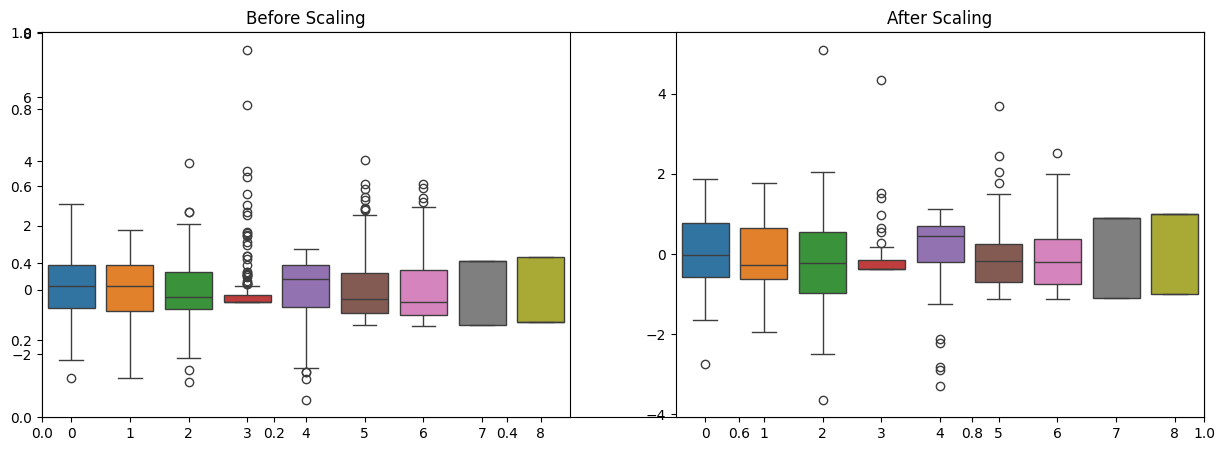

In [16]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_test)
plt.title('After Scaling')  
plt.show()


In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Squared Error: 2.2483458918974772
R2 Score: 0.9492020263112388


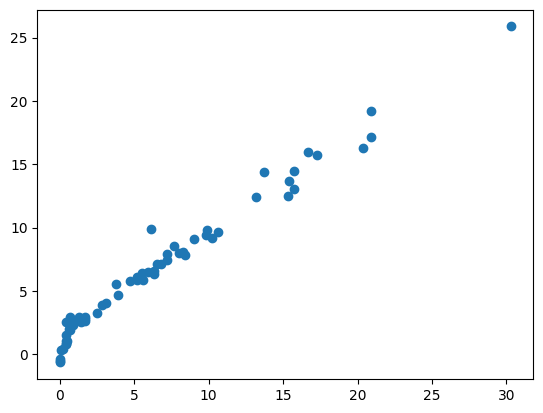

In [18]:
plt.scatter(y_test,y_pred)

Lasso Regression with Cross Validation

Mean Squared Error: 0.792499555474362
R2 Score: 0.9820946715928275


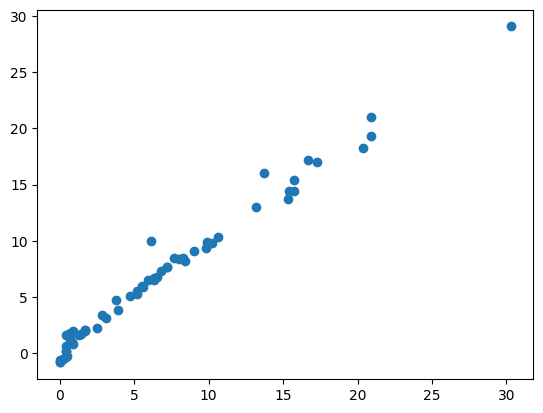

In [19]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train,y_train)
y_pred = lassocv.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)


In [20]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [21]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)


Ridge()

Mean Squared Error: 0.6949198918152096
R2 Score: 0.9842993364555512


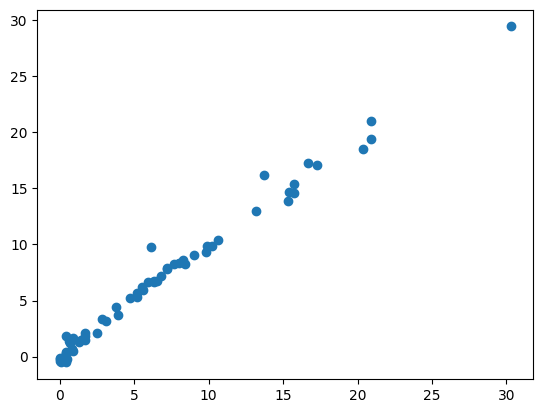

In [23]:
y_pred1 = ridge.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred1)
r2 = r2_score(y_test,y_pred1)
print("Mean Squared Error:",mse)

print("R2 Score:",r2)
plt.scatter(y_test,y_pred1)


In [24]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(x_train,y_train)



ElasticNet()

Mean Squared Error: 5.5172511010252245
R2 Score: 0.8753460589519703


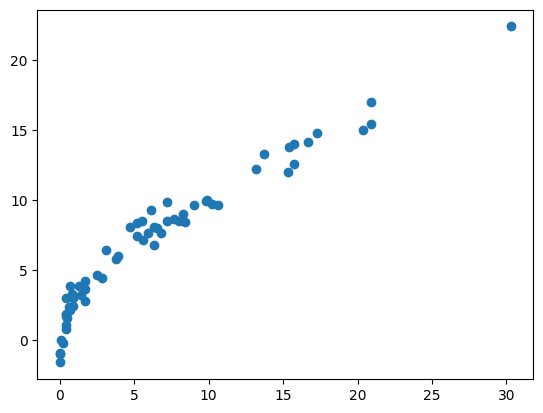

In [25]:
y_pred2 = elasticnet.predict(x_test)
mse = mean_squared_error(y_test,y_pred2)
r2 = r2_score(y_test,y_pred2)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred2)

In [26]:
# Pickling standard scaler and Ridge model for prediciton

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

pickle.dump(ridge,open('ridge.pkl','wb'))

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\DEEP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
